# ssGSEA

+ Author: Margaret Paiva
+ Author: Jon Katz  
+ Date:   2021-12-09  

In [15]:
suppressWarnings(require('pkgmaker',quietly = T))
require('plyr',quietly = T)
l_ply(c('dplyr',
        'data.table',
        'tidyr',  
        'tibble',
        'jsonlite', 
        'rjson',
        'httr',
        'GSVA', 
        'limma'), function(pkg) {
          invisible(capture.output(irequire(pkg, quiet = T, autoinstall = T)))
        })

## Gene Sets

In [12]:
# fwrite(x=as.list(get_sets), file="kegg_pathways.csv")

In [5]:
# get gene set for pathways
genesetfile <- tempfile()
geneset <- list()
get_sets <- c(
    "KEGG_ABC_TRANSPORTERS",
    "KEGG_ACUTE_MYELOID_LEUKEMIA",
    "KEGG_ADHERENS_JUNCTION",
    "KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY",
    "KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM",
    "KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION",
    "KEGG_ALLOGRAFT_REJECTION",
    "KEGG_ALPHA_LINOLENIC_ACID_METABOLISM",
    "KEGG_ALZHEIMERS_DISEASE",
    "KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM",
    "KEGG_AMINOACYL_TRNA_BIOSYNTHESIS",
    "KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS",
    "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",
    "KEGG_APOPTOSIS",
    "KEGG_ARACHIDONIC_ACID_METABOLISM",
    "KEGG_ARGININE_AND_PROLINE_METABOLISM",
    "KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC",
    "KEGG_ASCORBATE_AND_ALDARATE_METABOLISM",
    "KEGG_ASTHMA",
    "KEGG_AUTOIMMUNE_THYROID_DISEASE",
    "KEGG_AXON_GUIDANCE",
    "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY",
    "KEGG_BASAL_CELL_CARCINOMA",
    "KEGG_BASAL_TRANSCRIPTION_FACTORS",
    "KEGG_BASE_EXCISION_REPAIR",
    "KEGG_BETA_ALANINE_METABOLISM",
    "KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS",
    "KEGG_BLADDER_CANCER",
    "KEGG_BUTANOATE_METABOLISM",
    "KEGG_CALCIUM_SIGNALING_PATHWAY",
    "KEGG_CARDIAC_MUSCLE_CONTRACTION",
    "KEGG_CELL_ADHESION_MOLECULES_CAMS",
    "KEGG_CELL_CYCLE",
    "KEGG_CHEMOKINE_SIGNALING_PATHWAY",
    "KEGG_CHRONIC_MYELOID_LEUKEMIA",
    "KEGG_CIRCADIAN_RHYTHM_MAMMAL",
    "KEGG_CITRATE_CYCLE_TCA_CYCLE",
    "KEGG_COLORECTAL_CANCER",
    "KEGG_COMPLEMENT_AND_COAGULATION_CASCADES",
    "KEGG_CYSTEINE_AND_METHIONINE_METABOLISM",
    "KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION",
    "KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY",
    "KEGG_DILATED_CARDIOMYOPATHY",
    "KEGG_DNA_REPLICATION",
    "KEGG_DORSO_VENTRAL_AXIS_FORMATION",
    "KEGG_DRUG_METABOLISM_CYTOCHROME_P450",
    "KEGG_DRUG_METABOLISM_OTHER_ENZYMES",
    "KEGG_ECM_RECEPTOR_INTERACTION",
    "KEGG_ENDOCYTOSIS",
    "KEGG_ENDOMETRIAL_CANCER",
    "KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION",
    "KEGG_ERBB_SIGNALING_PATHWAY",
    "KEGG_ETHER_LIPID_METABOLISM",
    "KEGG_FATTY_ACID_METABOLISM",
    "KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY",
    "KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS",
    "KEGG_FOCAL_ADHESION",
    "KEGG_FOLATE_BIOSYNTHESIS",
    "KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM",
    "KEGG_GALACTOSE_METABOLISM",
    "KEGG_GAP_JUNCTION",
    "KEGG_GLIOMA",
    "KEGG_GLUTATHIONE_METABOLISM",
    "KEGG_GLYCEROLIPID_METABOLISM",
    "KEGG_GLYCEROPHOSPHOLIPID_METABOLISM",
    "KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM",
    "KEGG_GLYCOLYSIS_GLUCONEOGENESIS",
    "KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE",
    "KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE",
    "KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE",
    "KEGG_GLYCOSAMINOGLYCAN_DEGRADATION",
    "KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES",
    "KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES",
    "KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES",
    "KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS",
    "KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM",
    "KEGG_GNRH_SIGNALING_PATHWAY",
    "KEGG_GRAFT_VERSUS_HOST_DISEASE",
    "KEGG_HEDGEHOG_SIGNALING_PATHWAY",
    "KEGG_HEMATOPOIETIC_CELL_LINEAGE",
    "KEGG_HISTIDINE_METABOLISM",
    "KEGG_HOMOLOGOUS_RECOMBINATION",
    "KEGG_HUNTINGTONS_DISEASE",
    "KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM",
    "KEGG_INOSITOL_PHOSPHATE_METABOLISM",
    "KEGG_INSULIN_SIGNALING_PATHWAY",
    "KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION",
    "KEGG_JAK_STAT_SIGNALING_PATHWAY",
    "KEGG_LEISHMANIA_INFECTION",
    "KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION",
    "KEGG_LIMONENE_AND_PINENE_DEGRADATION",
    "KEGG_LINOLEIC_ACID_METABOLISM",
    "KEGG_LONG_TERM_DEPRESSION",
    "KEGG_LONG_TERM_POTENTIATION",
    "KEGG_LYSINE_DEGRADATION",
    "KEGG_LYSOSOME",
    "KEGG_MAPK_SIGNALING_PATHWAY",
    "KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG",
    "KEGG_MELANOGENESIS",
    "KEGG_MELANOMA",
    "KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450",
    "KEGG_MISMATCH_REPAIR",
    "KEGG_MTOR_SIGNALING_PATHWAY",
    "KEGG_N_GLYCAN_BIOSYNTHESIS",
    "KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY",
    "KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION",
    "KEGG_NEUROTROPHIN_SIGNALING_PATHWAY",
    "KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM",
    "KEGG_NITROGEN_METABOLISM",
    "KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY",
    "KEGG_NON_HOMOLOGOUS_END_JOINING",
    "KEGG_NON_SMALL_CELL_LUNG_CANCER",
    "KEGG_NOTCH_SIGNALING_PATHWAY",
    "KEGG_NUCLEOTIDE_EXCISION_REPAIR",
    "KEGG_O_GLYCAN_BIOSYNTHESIS",
    "KEGG_OLFACTORY_TRANSDUCTION",
    "KEGG_ONE_CARBON_POOL_BY_FOLATE",
    "KEGG_OOCYTE_MEIOSIS",
    "KEGG_OTHER_GLYCAN_DEGRADATION",
    "KEGG_OXIDATIVE_PHOSPHORYLATION",
    "KEGG_P53_SIGNALING_PATHWAY",
    "KEGG_PANCREATIC_CANCER",
    "KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS",
    "KEGG_PARKINSONS_DISEASE",
    "KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION",
    "KEGG_PATHWAYS_IN_CANCER",
    "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS",
    "KEGG_PENTOSE_PHOSPHATE_PATHWAY",
    "KEGG_PEROXISOME",
    "KEGG_PHENYLALANINE_METABOLISM",
    "KEGG_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM",
    "KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM",
    "KEGG_PPAR_SIGNALING_PATHWAY",
    "KEGG_PRIMARY_BILE_ACID_BIOSYNTHESIS",
    "KEGG_PRIMARY_IMMUNODEFICIENCY",
    "KEGG_PRION_DISEASES",
    "KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION",
    "KEGG_PROPANOATE_METABOLISM",
    "KEGG_PROSTATE_CANCER",
    "KEGG_PROTEASOME",
    "KEGG_PROTEIN_EXPORT",
    "KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION",
    "KEGG_PURINE_METABOLISM",
    "KEGG_PYRIMIDINE_METABOLISM",
    "KEGG_PYRUVATE_METABOLISM",
    "KEGG_REGULATION_OF_ACTIN_CYTOSKELETON",
    "KEGG_REGULATION_OF_AUTOPHAGY",
    "KEGG_RENAL_CELL_CARCINOMA",
    "KEGG_RENIN_ANGIOTENSIN_SYSTEM",
    "KEGG_RETINOL_METABOLISM",
    "KEGG_RIBOFLAVIN_METABOLISM",
    "KEGG_RIBOSOME",
    "KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY",
    "KEGG_RNA_DEGRADATION",
    "KEGG_RNA_POLYMERASE",
    "KEGG_SELENOAMINO_ACID_METABOLISM",
    "KEGG_SMALL_CELL_LUNG_CANCER",
    "KEGG_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT",
    "KEGG_SPHINGOLIPID_METABOLISM",
    "KEGG_SPLICEOSOME",
    "KEGG_STARCH_AND_SUCROSE_METABOLISM",
    "KEGG_STEROID_BIOSYNTHESIS",
    "KEGG_STEROID_HORMONE_BIOSYNTHESIS",
    "KEGG_SULFUR_METABOLISM",
    "KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS",
    "KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY",
    "KEGG_TASTE_TRANSDUCTION",
    "KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM",
    "KEGG_TERPENOID_BACKBONE_BIOSYNTHESIS",
    "KEGG_TGF_BETA_SIGNALING_PATHWAY",
    "KEGG_THYROID_CANCER",
    "KEGG_TIGHT_JUNCTION",
    "KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY",
    "KEGG_TRYPTOPHAN_METABOLISM",
    "KEGG_TYPE_I_DIABETES_MELLITUS",
    "KEGG_TYPE_II_DIABETES_MELLITUS",
    "KEGG_TYROSINE_METABOLISM",
    "KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS",
    "KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS",
    "KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION",
    "KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION",
    "KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION",
    "KEGG_VEGF_SIGNALING_PATHWAY",
    "KEGG_VIBRIO_CHOLERAE_INFECTION",
    "KEGG_VIRAL_MYOCARDITIS",
    "KEGG_WNT_SIGNALING_PATHWAY"
)
for(set in get_sets) {
    x <- httr::GET('http://www.gsea-msigdb.org/gsea/msigdb/download_geneset.jsp',
        query=list(
            geneSetName = set,
            fileType = 'txt'
        ),
        httr::write_disk(genesetfile, overwrite = TRUE)
    )
    suppressMessages(geneset1 <- readr::read_tsv(genesetfile))
    geneset[set] <- as.list(geneset1)
    Sys.sleep(0.5) # give the website a break so we don't wear out our welcome
}
# first element in each geneset is a descriptor
geneset <- lapply(geneset, function(x) x[-1])
str(geneset,1)

List of 186
 $ KEGG_ABC_TRANSPORTERS                                          : chr [1:44] "ABCA1" "ABCA10" "ABCA12" "ABCA13" ...
 $ KEGG_ACUTE_MYELOID_LEUKEMIA                                    : chr [1:57] "AKT1" "AKT2" "AKT3" "ARAF" ...
 $ KEGG_ADHERENS_JUNCTION                                         : chr [1:73] "ACP1" "ACTB" "ACTG1" "ACTN1" ...
 $ KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY                           : chr [1:67] "ACACB" "ACSL1" "ACSL3" "ACSL4" ...
 $ KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM                : chr [1:32] "ABAT" "ACY3" "ADSL" "ADSS1" ...
 $ KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION                 : chr [1:42] "ATP1A1" "ATP1A2" "ATP1A3" "ATP1A4" ...
 $ KEGG_ALLOGRAFT_REJECTION                                       : chr [1:37] "CD28" "CD40" "CD40LG" "CD80" ...
 $ KEGG_ALPHA_LINOLENIC_ACID_METABOLISM                           : chr [1:19] "ACOX1" "ACOX3" "FADS2" "JMJD7-PLA2G4B" ...
 $ KEGG_ALZHEIMERS_DISEASE                                      

## Expression Data

In [6]:
# In "gene_list.csv", define a list of genes of interest
gene_list  <- as.list(read.csv("gene_list.csv")$x)

In [5]:
# Define the data to query from API
data  <- list("request_data_type" = "expression",
              # If only pathway enrichment analysis is needed, you may request only one cancer type
              # to see what pathways are enriched for a specific cancer type
  "request_cancer_type" = c("Renal cell carcinoma", "Prostate", "Adenoid cystic carcinoma", "Breast", 
                            "Thyroid", "Testicular", "Hepatocellular carcinoma", "Melanoma"),
#   "request_genes" = c("ATM", "BRCA1", "BRCA2", "BRIP1", "CDK12", "FANCA", "HDAC2", "KRAS", 
#                       "PALB2", "SRY", "TP53", "NOTCH1", "CCND1", "BARD1", "FBLN2", "CDKN1B", 
#                       "RB1", "CHEK2", "APOBEC3B", "PALB2"),  # to define a list of genes here
  "request_genes" = gene_list,  # if a list of genes is defined in a file
  "request_dataset" = "PDX",
  "request_key" = "---",  # enter your token here
  "request_client" = 99,
  "request_user" = 1234,  # enter your user id here
  "request_workspace_id" = "1234-99",  # enter your user id "XXXX-99"
  "request_mode" = 'true')

In [ ]:
# Request data from API - this may take some time
request  <-  POST(url = 'https://lumin-fast-api.championsoncology.com/WS', 
                  body = data, encode = 'json')
request
# A successful request will give "Status: 200"

In [ ]:
# This will save the data file as a .json file in your root directory
response <- content(request)
response

In [16]:
# Enter the file name of the .json file in your root directory below
lt  <-  fromJSON(file = "./data/requested_data---19-10-2021---20_44_20.json")

In [17]:
# Create a dataframe from the data
df  <- do.call(rbind, lapply(lt, rbind))
df  <- as.data.frame(df)
df$gene  <- as.character(df$gene)  # each column is a list - specify data type
df$model  <- as.character(df$model)
df$log.tpm  <- as.numeric(df$log.tpm)
df$z  <- as.numeric(df$z)
head(df, 2)
print(dim(df))

v1,gene_id,log.rsem.rpkm,log.tpm,z,fold,trans,model,sort_key,gene,model_name,tumor_type
19463231,ENSG00000005187,2.03154538924124,2.7411490,-0.1693172,0.876569685689051,ENST00000440284:49.26% ENST00000567387:17.78% ENST00000501740:11.52% ENST00000289416:10.09%,CTG-3501,CTG-3501_Expression_1,ACSM3,CTG-3501,Breast
19463234,ENSG00000005243,0.43494348437293,0.7995996,-0.9946150,0.185174375597962,ENST00000006101:78.76% ENST00000579263:20.8%,CTG-3501,CTG-3501_Expression_1,COPZ2,CTG-3501,Breast


[1] 82800    12


In [18]:
# Pivot the data to have 'gene' as rows, 'model' as colomns, and 'log.tpm' as values
pdx_mat <- df %>% 
    select(c('gene', 'model', 'log.tpm'))  %>% 
    pivot_wider(names_from = model, values_from = log.tpm)  %>% 
    column_to_rownames('gene')
pdx_mat  <- pdx_mat[complete.cases(pdx_mat),]  # remove rows with missing values
pdx_mat[1:2, 1:10]
print(dim(pdx_mat))

,CTG-3501,CTG-0718,CTG-1181,CTG-0437,CTG-1843,CTG-0456,CTG-2768,CTG-1379,CTG-1471,CTG-0500
ACSM3,2.7411490,3.214430,2.694151,2.082150,5.471633,2.683937,0.7423767,3.333013,0.0253033,0.3042442
COPZ2,0.7995996,4.130462,7.072492,1.603433,5.820096,6.319975,6.3414629,3.313474,0.0000000,5.1539376


[1] 400 207


## 4. Gene Set Variation Analysis

In [24]:
pdx_gsva <- GSVA::gsva(as.matrix(pdx_mat), geneset, 
                       min.sz=10, max.sz=500, method='ssgsea')
# not a bad idea to save this for later
# save(pdx_mat, pdx_gsva, pdx_orig, geneset, genes, file="gsva.RData")
head(pdx_gsva, 2)

Estimating ssGSEA scores for 4 gene sets.
  |                                                                      |   0%Using parallel with 8 cores
  |======================================================================| 100%


,CTG-3501,CTG-0718,CTG-1181,CTG-0437,CTG-1843,CTG-0456,CTG-2768,CTG-1379,CTG-1471,CTG-0500,...,CTG-3342,CTG-2920,CTG-2697,CTG-1543,CTG-0818,CTG-1059,CTG-0670,CTG-3167,CTG-3062,CTG-3104
KEGG_ENDOCYTOSIS,0.1197260,-0.04597193,0.09423235,0.09615094,0.05839668,-0.03338031,-0.05817084,-0.02250796,0.1824051,0.01453318,...,0.09518556,0.04267841,0.1072464,0.1625216,0.3015156,0.1095101,0.2021062,0.03833956,0.09455785,0.1878749
KEGG_FOCAL_ADHESION,0.2979014,0.56290554,0.54259650,0.20347673,0.59452343,0.54395537,0.19366486,0.40810873,0.1874621,0.53436335,...,0.32259740,0.28717030,0.3704835,0.3578814,0.3518469,0.5337668,0.1492749,-0.04629764,0.38118750,-0.0867058


## 5. Semi-clustered Heatmap
Only genesets are clustered. Models are grouped by cancer type. The colored bar at the top indicates cancer type.

In [25]:
cancertype <- cancertype[order(cancertype[,'tumor_type']),]
cancertype <- cancertype[cancertype[,'model_name'] %in% colnames(pdx_gsva),]
cancertype[,'tumor_type'] <- as.factor(cancertype[,'tumor_type'])
# cluster gene sets
rw_d <- dist(pdx_gsva)
rw_cl <- hclust(rw_d)
pdx_gsva <- pdx_gsva[rw_cl$order, ] 
# Change plot size
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res=180)
layout(matrix(c(1,2)), heights=c(1,12))
par(mar=c(0,15,2,0)+0.1)
image(
    matrix(as.numeric(factor(cancertype[,'tumor_type']))), 
    axes=FALSE, 
    ann=FALSE, 
    main=NA, 
    col=hcl.colors(length(unique(cancertype$tumor_type)), "viridis")
)
#axis(side=3)
mtext(side=3, text=unique(cancertype[,'tumor_type']), at=c(0.01, 0.2, 0.7, 0.97), cex=0.7)
par(mar=c(0,15,0,0)+0.1)
image(t(pdx_gsva[,cancertype[,'model_name']]), axes=FALSE, ann=FALSE)
mtext(side=2, text=rownames(pdx_gsva), at=seq(0, 1, length.out=nrow(pdx_gsva)), line=1, las=2, cex=0.4)

ERROR: Error in eval(expr, envir, enclos): object 'cancertype' not found


## 6. Clustered Heatmap

In [132]:
# cluster samples
col_d <- dist(t(pdx_gsva))
col_cl <- hclust(col_d)
# re-order matrix for static printing
pdx_cl <- pdx_gsva[, col_cl$order] 
# re-order cancer types to match matrix
rownames(cancertype) <- cancertype[,'model_name']
cancertype <- cancertype[colnames(pdx_cl),]

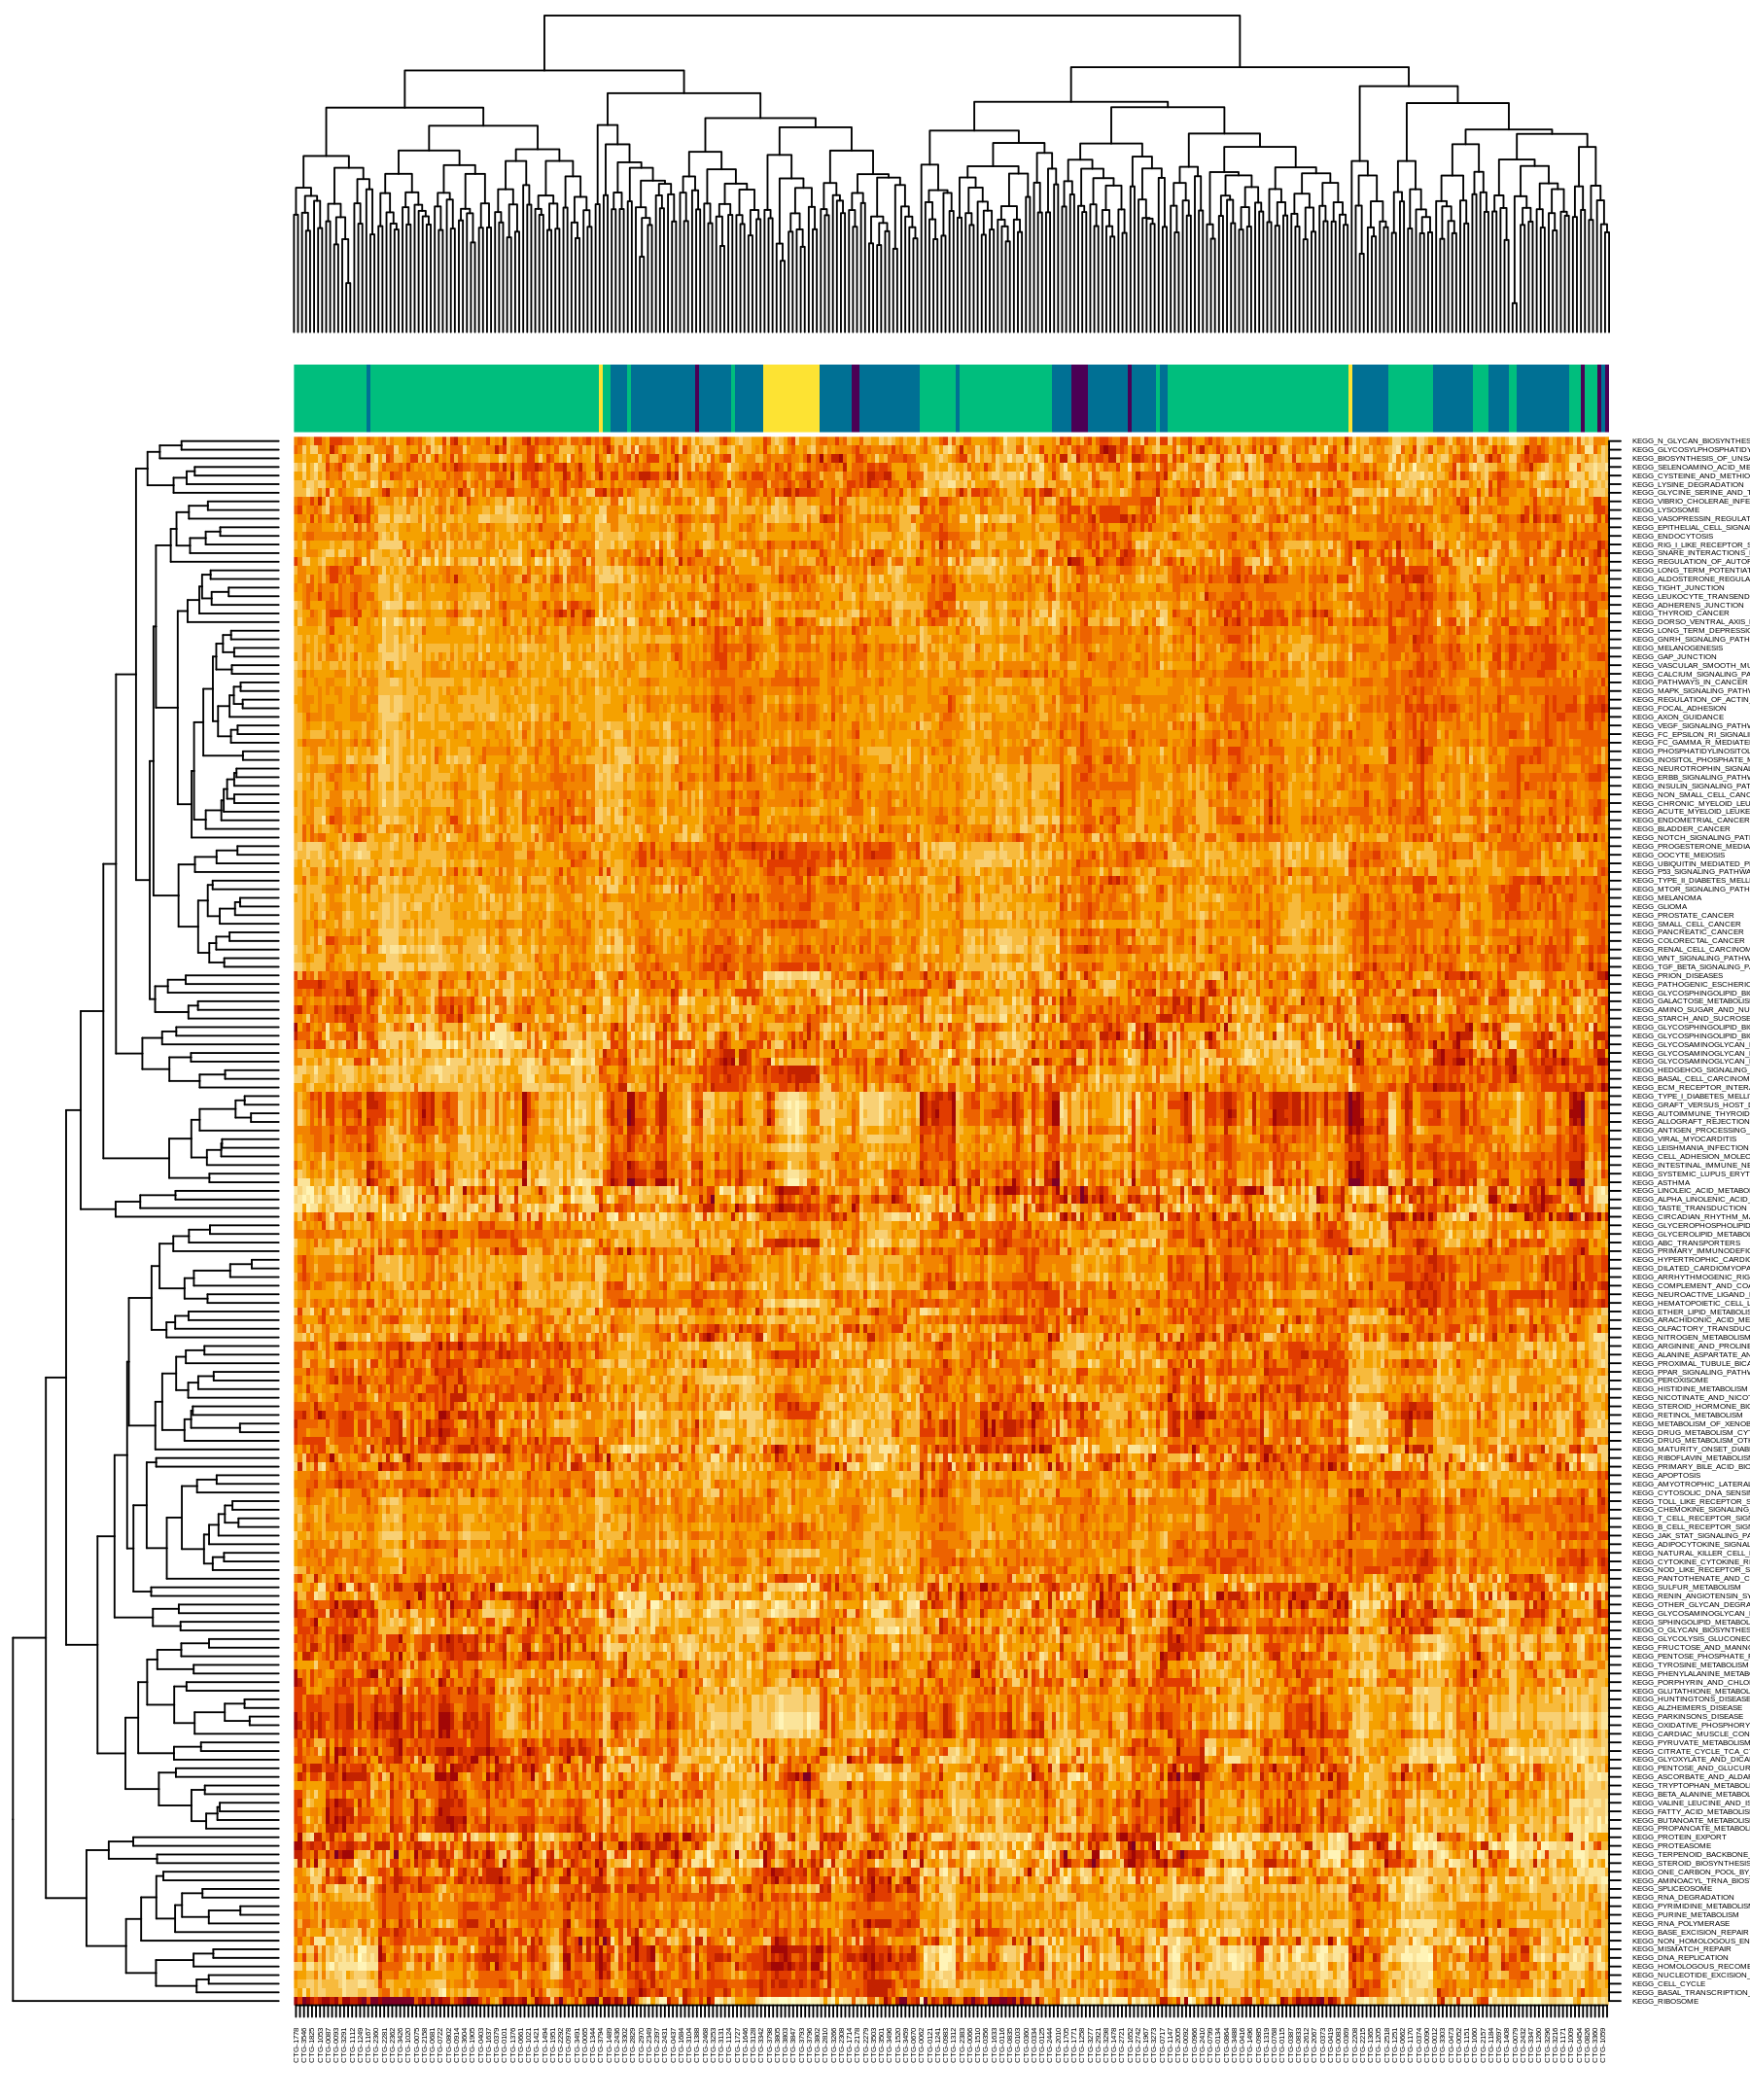

In [133]:
# Change plot size
options(repr.plot.width=10, repr.plot.height=12, repr.plot.res=180)
# layout our plot
graphics::layout(
    matrix(c(
        5,5,2,2,2,2,
        1,3,4,4,4,4,
        1,3,4,4,4,4,
        1,3,4,4,4,4,
        1,3,4,4,4,4,
        1,3,4,4,4,4
    ), ncol=6),
    heights=c(5,1,20)
)
# plot genes dengrogram
par(mar=c(0,0,0,6)+0.1)
plot(col_cl, labels = FALSE, hang = -0.1, axes = FALSE, ann = FALSE, xaxs="i")
# plot samples dendrogram
par(mar=c(4,0,0,0)+0.1)
plot(as.dendrogram(rw_cl), leaflab = 'none', axes = FALSE, ann = FALSE, horiz=TRUE, yaxs="i")
# plot cancer type
par(mar=c(0,0,0,6)+0.1)
image(
    matrix(as.numeric(cancertype[,'tumor_type'])), 
    axes=FALSE, 
    ann=FALSE, 
    main=NA, 
    col=hcl.colors(length(unique(cancertype$tumor_type)), "viridis")
)
# plot the heatmap
par(mar=c(4,0,0,6)+0.1)
image(x=0:ncol(pdx_cl), y=0:nrow(pdx_cl), z=t(pdx_cl), axes=FALSE, xlab=NA, ylab=NA)
axis(4, at=1:nrow(pdx_cl)-0.5, labels=gsub("_LUNG", "", rownames(pdx_cl)), las=2, cex.axis=0.4)
axis(1, at=1:ncol(pdx_cl)-0.5, labels=colnames(pdx_cl), las=3, cex.axis=0.4)

## 7. DGE of GSVA Between Colorectal and Breast Cancers

In [134]:
# Filter the models to our focal cancer types
dge_dat <- cancertype[cancertype[,'tumor_type'] %in% c("Breast", "Colorectal"),]
dge_dat[,'tumor_type'] <- droplevels(dge_dat[,'tumor_type'])
rownames(dge_dat) <- dge_dat[,'model_name']
# Filter the data to models that match our focal cancer types
dge_dat <- dge_dat[colnames(pdx_gsva), 'tumor_type', drop=FALSE]
dge_dat <- na.omit(dge_dat)
pdx_gsva <- pdx_gsva[,rownames(dge_dat)]
# Build the model that estimates t-statistics for each gene set
mod <- model.matrix(~0+tumor_type, dge_dat)
colnames(mod) <- gsub("tumor_type", "", colnames(mod))
fit <- limma::lmFit(pdx_gsva, mod)
fit <- limma::eBayes(fit)
res <- limma::decideTests(fit, p.value=0.01)
summary(res)

       Breast Colorectal
Down       49         57
NotSig     88         66
Up         45         59

In [135]:
tt <- limma::topTable(fit, coef=2, n=Inf)
DEpwys <- rownames(tt)[tt$adj.P.Val <= 0.01]

## 8. Volcano Plot

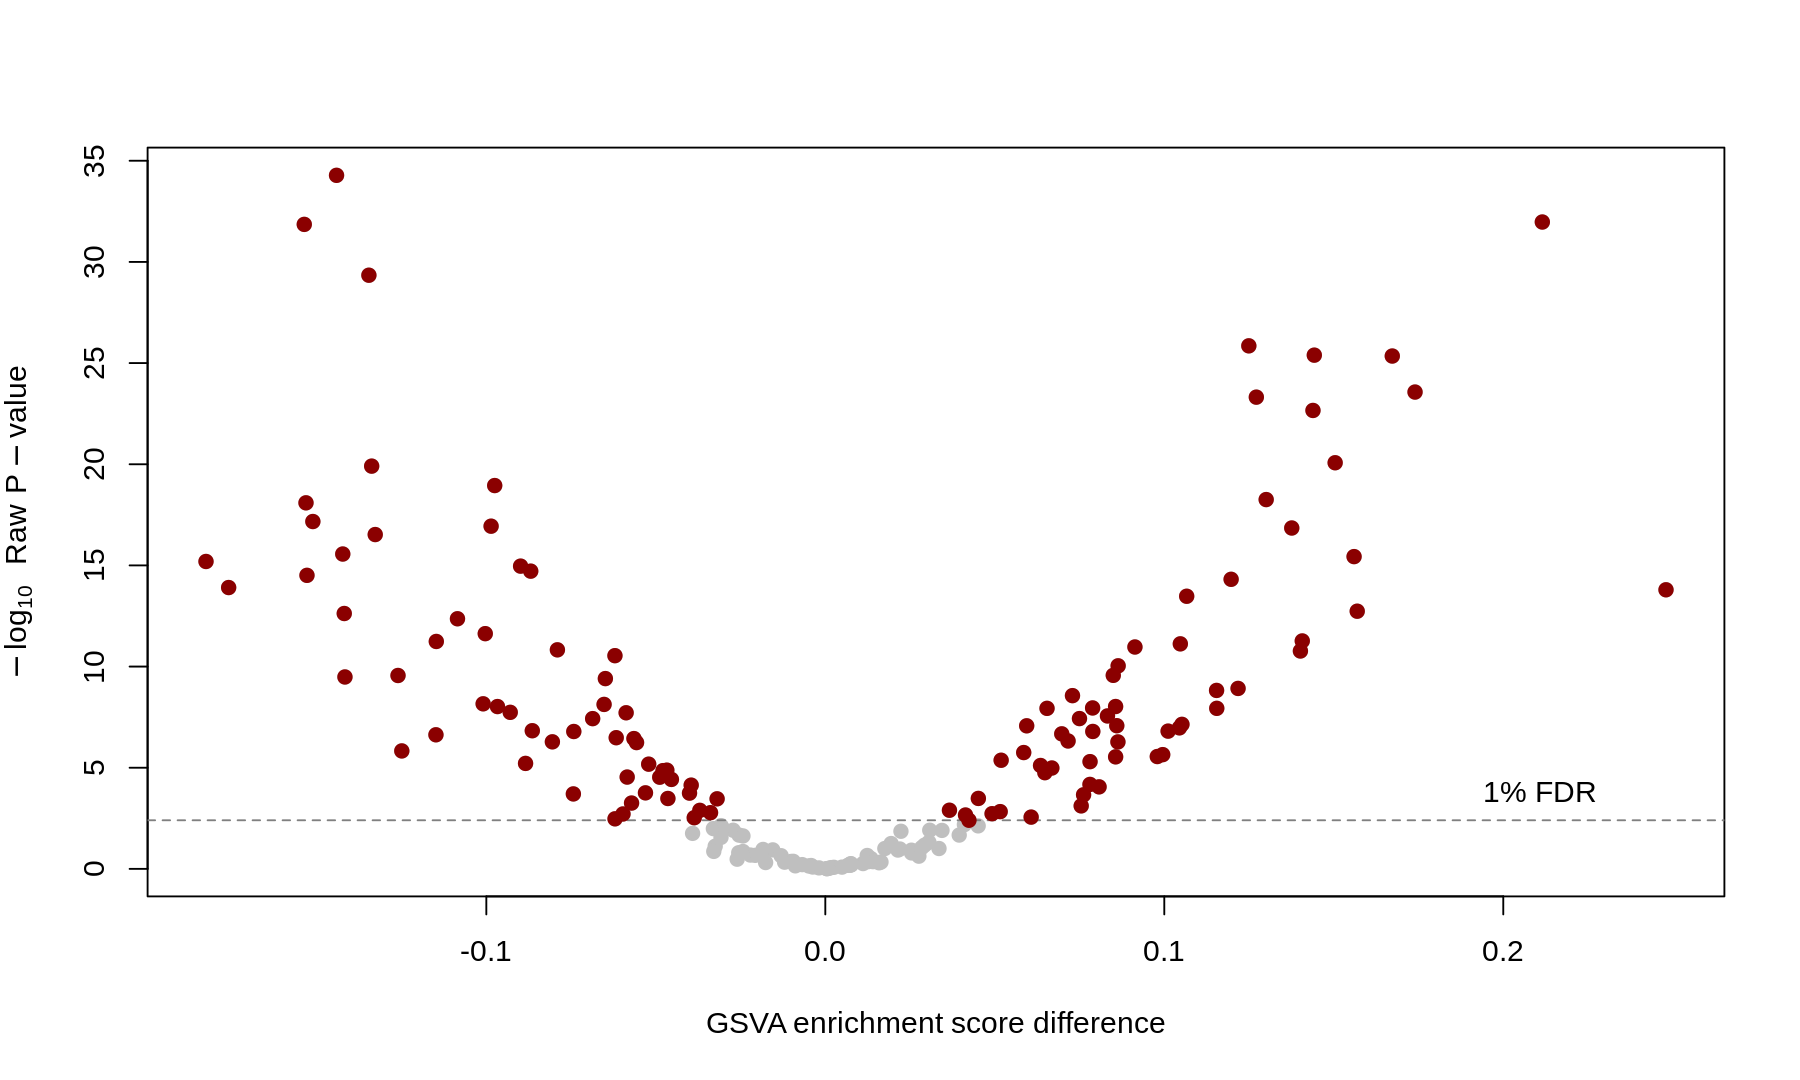

In [136]:
# Change plot size
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res=180)
plot(
  tt$logFC, 
  -log10(tt$P.Value), 
  pch=19, 
  cex=1, 
  col=grey(0.75),
  main="", 
  xlab="GSVA enrichment score difference", 
  ylab=expression(-log[10]~~Raw~P-value)
)
abline(h=-log10(max(tt$P.Value[tt$adj.P.Val <= 0.01])), col=grey(0.5), lwd=1, lty=2)
points(
    tt$logFC[match(DEpwys, rownames(tt))],
    -log10(tt$P.Value[match(DEpwys, rownames(tt))]), 
    pch=19, 
    cex=1, 
    col="darkred"
)
text(
    max(tt$logFC)*0.85, 
    -log10(max(tt$P.Value[tt$adj.P.Val <= 0.01])), 
    "1% FDR", 
    pos=3
)

In [137]:
length(DEpwys)

[1] 116

There are 116 MSigDB KEGG differentially expressed pathways with FDR < 1%.  

In [138]:
tt

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS,-0.14418781,-0.06332998,-14.056794,5.251582e-35,9.557879e-33,68.80582
KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG,0.21151898,0.03871384,13.435911,1.066793e-32,8.470338e-31,63.55397
KEGG_OOCYTE_MEIOSIS,-0.15370805,-0.04438684,-13.404289,1.396210e-32,8.470338e-31,63.28802
KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION,-0.13464333,-0.03371092,-12.719522,4.545353e-30,2.068135e-28,57.57114
KEGG_PPAR_SIGNALING_PATHWAY,0.12493710,0.02753903,11.749073,1.405184e-26,5.114869e-25,49.63312
KEGG_DRUG_METABOLISM_OTHER_ENZYMES,0.14425441,0.03694838,11.618956,4.057906e-26,1.165645e-24,48.58597
KEGG_CARDIAC_MUSCLE_CONTRACTION,0.16725543,0.04976051,11.606698,4.483249e-26,1.165645e-24,48.48755
KEGG_RETINOL_METABOLISM,0.17397008,0.02594360,11.098035,2.705145e-24,6.154206e-23,44.44028
KEGG_GLYCEROLIPID_METABOLISM,0.12715212,0.01957458,11.025356,4.830238e-24,9.767814e-23,43.86814
